# **[Data4Life] - Introduction to Data Science**
Topic ***NBA*** - Group ***13***

## **Overview**
## **Title 2: Rookies**
**Objective: Identify Top-performing Rookies (2024-2025)**

**Analysis Focus:**
- Focus only on the current season to identify rookies with standout performances
- Key metrics: EFF, PTS, REB, AST

### **Data Preparation**

First, we load the dataset containing rookie statistics for the 2024-2025 season. After loading, we'll explore the dataset to understand its structure, verify data types, and ensure no critical data is missing.

### **Import modules**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

### **Load datasets**

In [7]:
rookies_df = pd.read_csv("../Intro_DS_Git/final_data/rookie_stats.csv")
rookies_df = rookies_df.loc[rookies_df["season"] == "2024-2025"]

rookies_df.head()

,season,rank,player,age,yrs,g,mp,fg,fga,3p,...,3p%,ft%,mp_(per_game),pts_(per_game),trb_(per_game),ast_(per_game),stl_(per_game),blk_(per_game),debut_date,debut_match
2043,2024-2025,1,Trey Alexander,21,1,9,44,3,12,1,...,0.167,1.000,4.9,1.0,0.1,0.2,0.0,0.1,2024-10-24,DEN vs. OKC
2044,2024-2025,2,Jamison Battle,23,1,24,326,49,101,33,...,0.440,0.818,13.6,5.8,2.0,0.9,0.1,0.2,2024-10-23,TOR vs. CLE
2045,2024-2025,3,Reece Beekman,23,1,2,4,1,1,0,...,NaN,NaN,2.0,1.0,0.5,0.5,0.5,0.0,2024-10-29,GSW vs. NOP
2046,2024-2025,4,Adem Bona,21,1,14,90,8,13,0,...,NaN,0.833,6.4,1.5,1.7,0.0,0.0,0.4,2024-10-23,PHI vs. MIL
2047,2024-2025,5,Jalen Bridges,23,1,2,11,0,2,0,...,0.000,0.500,5.5,0.5,0.5,0.0,0.0,0.0,2024-11-13,PHO @ SAC


### **Clean data**

**Check if any missing values**

In [ ]:
rookies_df.isnull().sum()

season             0
rank               0
player             0
age                0
yrs                0
g                  0
mp                 0
fg                 0
fga                0
3p                 0
3pa                0
ft                 0
fta                0
orb                0
trb                0
ast                0
stl                0
blk                0
tov                0
pf                 0
pts                0
fg%                1
3p%               10
ft%               20
mp_(per_game)      0
pts_(per_game)     0
trb_(per_game)     0
ast_(per_game)     0
stl_(per_game)     0
blk_(per_game)     0
debut_date         0
debut_match        0
dtype: int64

**Drop rows with any missing values**

In [ ]:
rookies_df = rookies_df.dropna()

### **Pre-processing data**

Summary information about the DataFrame, including the number of non-null entries, data types, and memory usage

In [8]:
rookies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 2043 to 2118
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          76 non-null     object 
 1   rank            76 non-null     int64  
 2   player          76 non-null     object 
 3   age             76 non-null     int64  
 4   yrs             76 non-null     int64  
 5   g               76 non-null     int64  
 6   mp              76 non-null     int64  
 7   fg              76 non-null     int64  
 8   fga             76 non-null     int64  
 9   3p              76 non-null     int64  
 10  3pa             76 non-null     int64  
 11  ft              76 non-null     int64  
 12  fta             76 non-null     int64  
 13  orb             76 non-null     int64  
 14  trb             76 non-null     int64  
 15  ast             76 non-null     int64  
 16  stl             76 non-null     int64  
 17  blk             76 non-null     int64

Descriptive statistics that summarize the central tendency, dispersion, and shape of the DataFrame's numerical columns

In [9]:
rookies_df.describe().round(3)

,rank,age,yrs,g,mp,fg,fga,3p,3pa,ft,...,pts,fg%,3p%,ft%,mp_(per_game),pts_(per_game),trb_(per_game),ast_(per_game),stl_(per_game),blk_(per_game)
count,76.000,76.000,76.0,76.000,76.000,76.000,76.000,76.000,76.000,76.000,...,76.000,75.000,66.000,56.000,76.000,76.000,76.000,76.000,76.000,76.000
mean,38.500,21.855,1.0,12.066,182.697,25.145,58.882,8.066,25.908,8.737,...,67.092,0.408,0.253,0.723,11.083,3.843,1.913,0.820,0.343,0.243
std,22.083,1.930,0.0,8.528,206.754,31.967,73.453,12.425,36.366,13.077,...,86.743,0.223,0.215,0.228,7.852,3.519,1.744,0.942,0.366,0.381
min,1.000,19.000,1.0,1.000,2.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.500,0.000,0.000,0.000,0.000,0.000
25%,19.750,20.000,1.0,5.000,14.000,1.750,5.750,0.000,2.000,0.000,...,4.000,0.310,0.000,0.561,4.450,1.000,0.775,0.000,0.000,0.000
50%,38.500,22.000,1.0,11.500,93.500,9.000,18.500,2.000,7.000,3.000,...,22.500,0.400,0.267,0.734,8.150,2.650,1.500,0.500,0.300,0.100
75%,57.250,23.000,1.0,19.250,309.000,42.250,98.750,10.250,32.250,10.250,...,108.250,0.500,0.350,0.906,16.950,5.650,2.600,1.225,0.600,0.300
max,76.000,28.000,1.0,27.000,658.000,126.000,274.000,51.000,133.000,62.000,...,352.000,1.000,1.000,1.000,28.600,15.300,8.300,4.000,2.000,2.100


### **Selecting Top Rookies**

We’ll identify top rookies based on:
1. Scoring (Points Per Game: `pts_(per_game)`).
2. All-Around Performance (averages across `pts_(per_game)`, `trb_(per_game)`, `ast_(per_game)`, etc.).
3. Shooting Efficiency (`fg%`, `3p%`, `ft%`).


In [12]:
# Define criteria for top rookies
top_scorers = rookies_df.sort_values(by='pts_(per_game)', ascending=False).head(10)

# Calculate an all-around performance score (sum of normalized key metrics)
scaler = MinMaxScaler()
metrics = ['pts_(per_game)', 'trb_(per_game)', 'ast_(per_game)', 'stl_(per_game)', 'blk_(per_game)']
rookies_df['all_around_score'] = scaler.fit_transform(rookies_df[metrics]).sum(axis=1)

top_all_around = rookies_df.sort_values(by='all_around_score', ascending=False).head(10)

# Display top rookies
print("Top 10 Scorers:\n", top_scorers[['player', 'pts_(per_game)']])
print("Top 10 All-Around Performers:\n", top_all_around[['player', 'all_around_score']])


Top 10 Scorers:
                   player  pts_(per_game)
2090        Jared McCain            15.3
2051      Stephon Castle            12.1
2117        Jaylen Wells            11.5
2063           Zach Edey            11.1
2100  Zaccharie Risacher            10.9
2084       Dalton Knecht            10.8
2103           Alex Sarr            10.7
2066     Trentyn Flowers             9.0
2050  Carlton Carrington             8.9
2069      Kyshawn George             7.5
Top 10 All-Around Performers:
                   player  all_around_score
2103           Alex Sarr          3.763520
2050  Carlton Carrington          3.310393
2063           Zach Edey          3.296190
2051      Stephon Castle          3.203954
2054     Donovan Clingan          2.937681
2069      Kyshawn George          2.757536
2090        Jared McCain          2.697826
2100  Zaccharie Risacher          2.618261
2095      Jonathan Mogbo          2.460476
2055      Isaiah Collier          2.200663


**Bar Chart for Top Scorers**

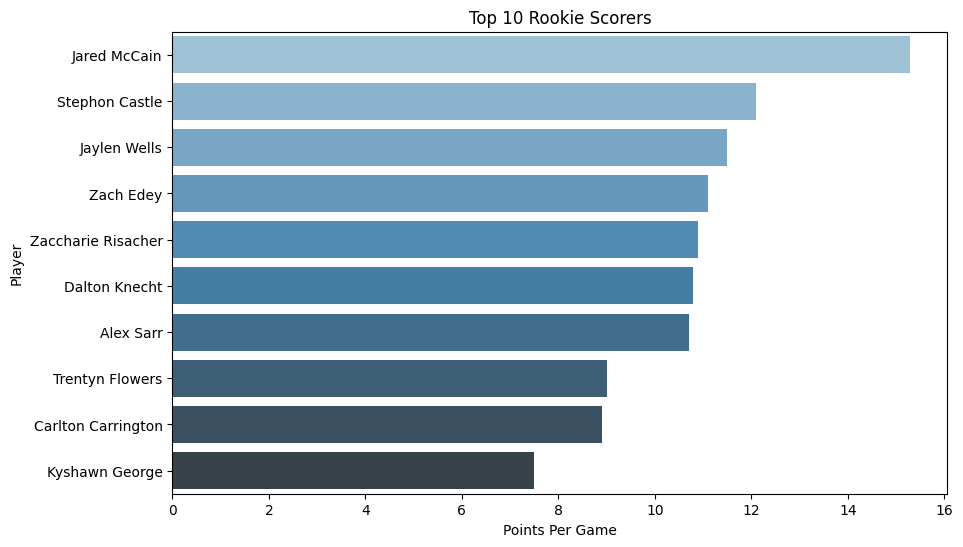

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_scorers, x='pts_(per_game)', y='player', palette='Blues_d')
plt.title('Top 10 Rookie Scorers')
plt.xlabel('Points Per Game')
plt.ylabel('Player')
plt.show()

**Comments**

- **Jared McCain** is the clear standout among rookies, leading with an impressive **15.3** points per game. This indicates his significant offensive contribution and potential as a primary scorer.
- **Stephon Castle** (12.1 PPG) and **Jaylen Wells** (11.5 PPG) follow closely, showcasing strong offensive abilities. Their scoring suggests consistent performance, making them valuable assets to their teams.
- The gap between the **top scorer** (Jared McCain) and the **10th-ranked player** (Kyshawn George, 7.5 PPG) is notable. This shows a sharp drop in scoring, highlighting a concentration of offensive talent at the top.
- Players like **Alex Sarr** (10.7 PPG) and **Zaccharie Risacher** (10.9 PPG) also display balanced scoring potential, indicating they may have a strong all-around game.
- Teams with these rookies likely benefit from their scoring ability, but further analysis is needed to determine how their scoring translates to team success or impacts game outcomes.

**Radar Chart for All-Around Performers**

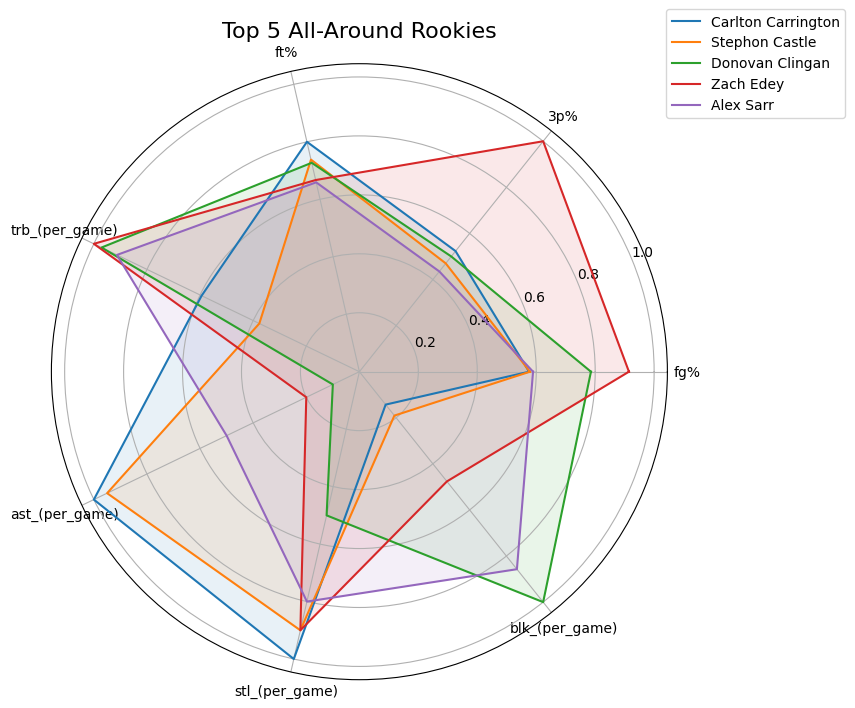

In [14]:
# Select metrics to include in the radar chart
metrics = ['fg%', '3p%', 'ft%', 'trb_(per_game)', 'ast_(per_game)', 'stl_(per_game)', 'blk_(per_game)']

# Normalize data for radar chart 
for col in metrics:
    rookies_df[col] = (rookies_df[col] - rookies_df[col].min()) / (rookies_df[col].max() - rookies_df[col].min())

# Prepare data for the radar chart
top_all_around_players = top_all_around['player'].head(5).tolist()
radar_data = rookies_df.loc[rookies_df['player'].isin(top_all_around_players), ['player'] + metrics]
radar_data = radar_data.set_index('player')

# Number of variables we're plotting
categories = list(radar_data.columns)
num_vars = len(categories)

# Create a radar chart for each player
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Loop through each player and add them to the radar chart
for i, player in enumerate(radar_data.index):
    values = radar_data.loc[player].tolist()
    values += values[:1]  # Repeat the first value to close the radar chart
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    ax.plot(angles, values, label=player)
    ax.fill(angles, values, alpha=0.1)

# Add labels and title
ax.set_xticks([n / float(num_vars) * 2 * pi for n in range(num_vars)])
ax.set_xticklabels(categories)
ax.set_title("Top 5 All-Around Rookies", fontsize=16)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

**Insights from the Radar Chart**

**Comparison Across Metrics:**

- Each player's performance in the metrics is represented by a unique polygon. Larger and more balanced polygons suggest a well-rounded player.
- Players with peaks in specific areas indicate their strengths in those metrics.

**Key Observations:**

- Alex Sarr: Exhibits strong performance across several metrics, especially in `blocks (blk_(per_game))` and `rebounds (trb_(per_game))`, making him a valuable defender.
- Stephon Castle: Shows consistent performance, particularly in `assists (ast_(per_game))`, suggesting a good playmaking ability.
- Carlton Carrington: Stands out in `free throw percentage (ft%)`, which is critical in clutch situations.
- Zach Edey: Dominates in `rebounds (trb_(per_game))`, indicating his prowess in securing possession.
- Donovan Clingan: Performs well in `field goal percentage (fg%)` and `blocks`, highlighting his efficiency in scoring and rim protection.

**Strengths and Weaknesses:**

- Some players excel in specific metrics but lag in others, indicating areas where they might need improvement.
- For example, a player strong in defense metrics like blocks `(blk_(per_game))` but weaker in assists `(ast_(per_game))` might focus on improving their offensive contributions.

This radar chart provides a clear visual representation of the strengths and weaknesses of the top all-around rookies, offering valuable insights for player development and team-building strategies.

### **Visualize Efficiency Metrics for the Top All-Around Performers**

The **top all-around performers** bring a combination of scoring, rebounding, and assisting abilities. Evaluating their **efficiency metrics** (FG%, 3P%, FT%) allows us to see how these players balance versatility with scoring precision. This step can reveal which all-around players are also efficient scorers.

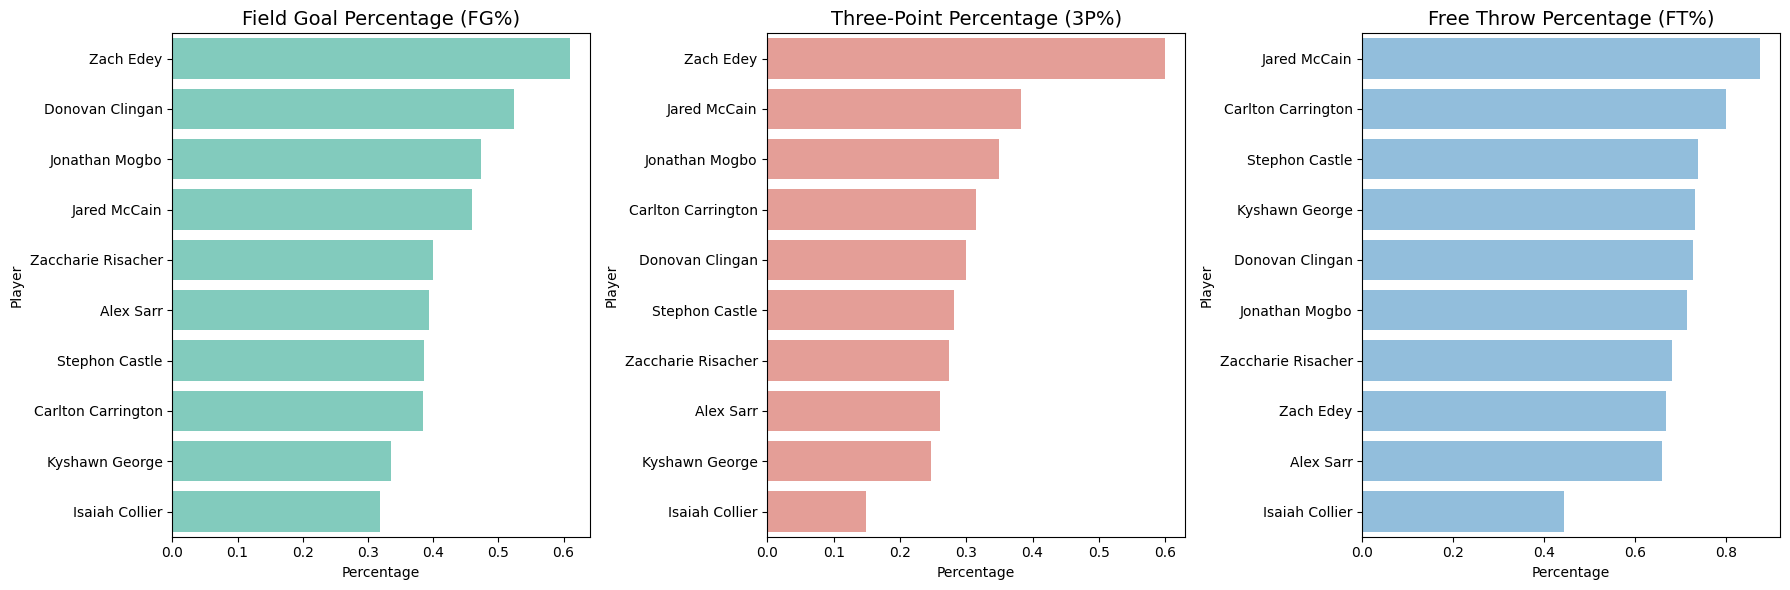

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
metrics = ['fg%', '3p%', 'ft%']
titles = ['Field Goal Percentage (FG%)', 'Three-Point Percentage (3P%)', 'Free Throw Percentage (FT%)']
colors = ['#76D7C4', '#F1948A', '#85C1E9']

# Loop to create a bar chart for each metric
for i, metric in enumerate(metrics):
    sns.barplot(
        data=top_all_around.sort_values(metric, ascending=False),
        x=metric,
        y='player',
        color=colors[i],  # Set a custom color
        ax=ax[i]
    )
    ax[i].set_title(titles[i], fontsize=14)
    ax[i].set_xlabel('Percentage')
    ax[i].set_ylabel('Player')

plt.tight_layout()
plt.show()

**General Observations**

1. **Versatile Players:** Players like **Jared McCain** and **Zach Edey** consistently rank high across multiple categories, highlighting their overall scoring efficiency.

2. **Specialization**: Some players excel in specific areas, like **Jared McCain** in free throws and three-pointers, while others, like **Zach Edey**, dominate in field goal percentage.

3. **Improvement Areas**: Players at the lower end of each chart, such as **Isaiah Collier**, should focus on improving shooting techniques to enhance their overall efficiency.

###  **Rookie Defensive and Playmaking Contributions**

#### **Defensive Contributions**

To assess defensive impact, three metrics were analyzed:

- **Steals per Game (STL)**: Indicates the player’s ability to disrupt the opponent's offense by forcing turnovers.
- **Blocks per Game (BLK)**: Highlights rim protection and the ability to prevent opponents from scoring inside the paint.
- **Rebounds per Game (REB)**: Measures the player's control over missed shots, crucial for limiting second-chance opportunities for opponents.

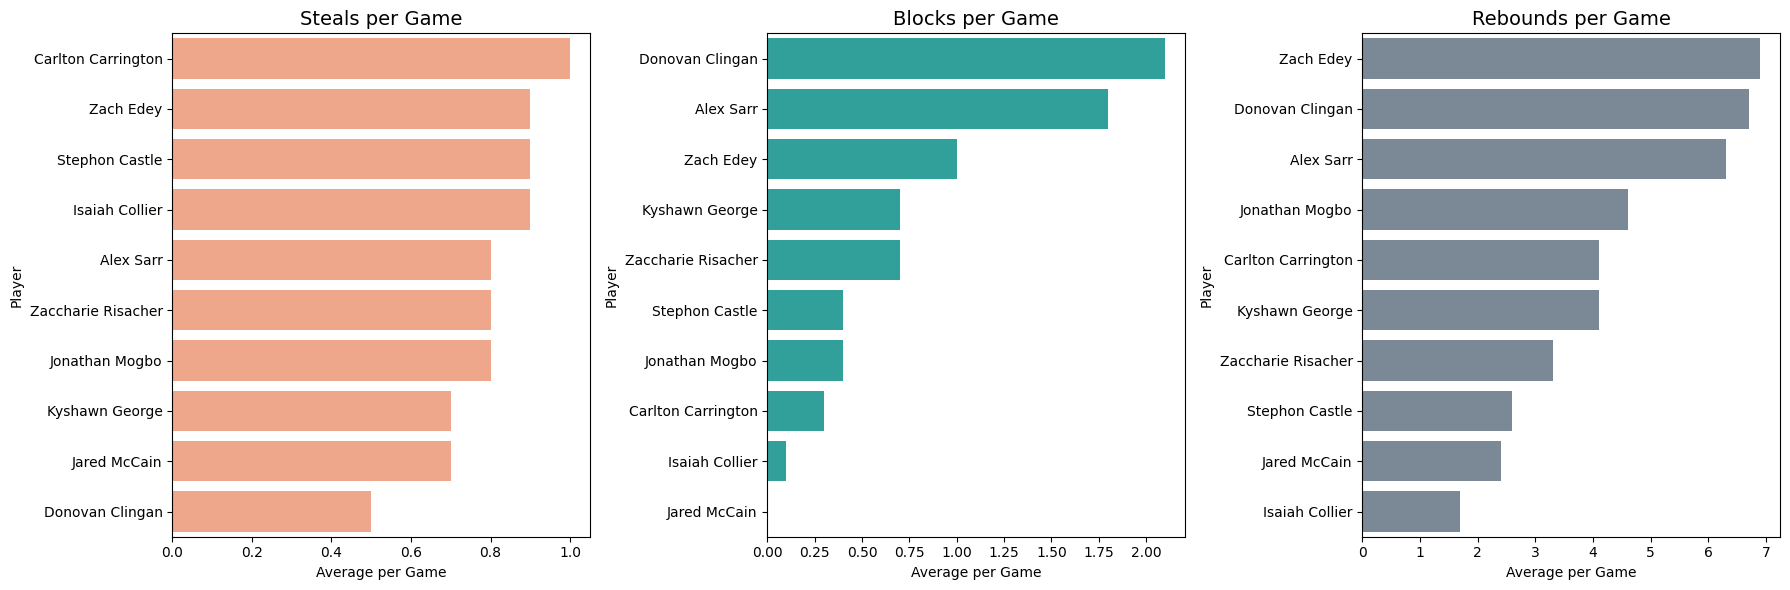

In [16]:
defense_metrics = ['stl_(per_game)', 'blk_(per_game)', 'trb_(per_game)']
titles_defense = ['Steals per Game', 'Blocks per Game', 'Rebounds per Game']
colors_defense = ['#FFA07A', '#20B2AA', '#778899']

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
for i, metric in enumerate(defense_metrics):
    sns.barplot(
        data=top_all_around.sort_values(metric, ascending=False),
        x=metric,
        y='player',
        color=colors_defense[i],
        ax=ax[i]
    )
    ax[i].set_title(titles_defense[i], fontsize=14)
    ax[i].set_xlabel('Average per Game')
    ax[i].set_ylabel('Player')

plt.tight_layout()
plt.show()

#### **Playmaking Contributions**

Playmaking contributions are measured by:
- **Assists per Game (AST)**: reflects a player's ability to create scoring opportunities for teammates. A higher assist count indicates effective playmaking and teamwork.

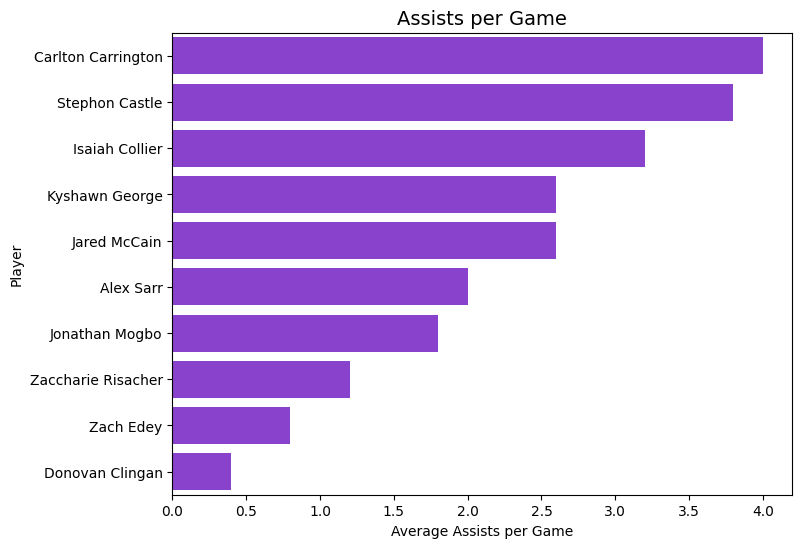

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_all_around.sort_values('ast_(per_game)', ascending=False),
    x='ast_(per_game)',
    y='player',
    color='#8A2BE2'
)
plt.title('Assists per Game', fontsize=14)
plt.xlabel('Average Assists per Game')
plt.ylabel('Player')
plt.show()

**Conclusion**

From the analysis, it is evident that several rookies have made significant contributions in both defense and playmaking:

1. **Defensive Specialists:**

- **Donovan Clingan** and **Zach Edey** have emerged as dominant defenders, excelling in blocks and rebounds, making them critical for rim protection and controlling the paint.
- **Carlton Carrington** has showcased exceptional skills in generating steals, disrupting opponent offenses.

2. **Playmaking Leaders:**

- **Carlton Carrington** stands out as a versatile player, leading not only in steals but also in assists, highlighting his dual capability as a defender and facilitator.
- **Stephon Castle** and **Isaiah Collier** have also demonstrated their ability to support teammates, emphasizing their value in offensive coordination.

3. **Well-Rounded Players:**

- Players like **Alex Sarr** and **Jonathan Mogbo** contribute steadily across multiple categories, showcasing their versatility and adaptability on both ends of the court.

Overall, rookies such as **Donovan Clingan**, **Zach Edey**, and **Carlton Carrington** appear to be standout performers, each excelling in specific roles critical to team success. These insights provide a strong foundation for identifying the most impactful rookies in terms of defensive and playmaking contributions.